In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/fraudTrain.csv")

In [3]:
basic_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "missing_values": df.isnull().sum(),
    "data_types": df.dtypes
}

print(basic_info)

{'shape': (1296675, 23), 'columns': ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'], 'missing_values': Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64, 'data_types': Unnamed: 0                 int64
trans_date_tran

/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3815505957.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Fraud Type", y="Percentage", data=fraud_df, palette=["skyblue", "salmon"])


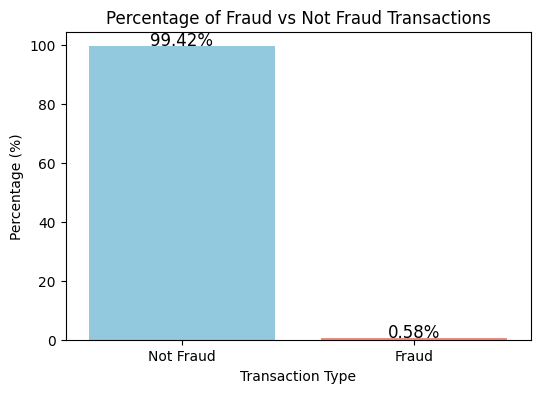

In [4]:

fraud_counts = df["is_fraud"].value_counts(normalize=True) * 100
fraud_df = pd.DataFrame({
    "Fraud Type": ["Not Fraud", "Fraud"],
    "Percentage": [fraud_counts[0], fraud_counts[1]]
})


plt.figure(figsize=(6, 4))
sns.barplot(x="Fraud Type", y="Percentage", data=fraud_df, palette=["skyblue", "salmon"])


for index, row in fraud_df.iterrows():
    plt.text(index, row["Percentage"] + 0.2, f'{row["Percentage"]:.2f}%', ha='center', fontsize=12)

plt.title("Percentage of Fraud vs Not Fraud Transactions")
plt.ylabel("Percentage (%)")
plt.xlabel("Transaction Type")
plt.ylim(0, max(fraud_df["Percentage"]) + 5)
plt.show()


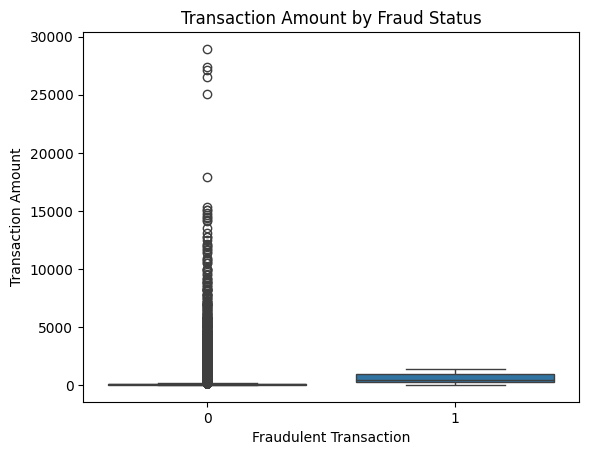

In [5]:
sns.boxplot(x="is_fraud", y="amt", data=df)
plt.xlabel("Fraudulent Transaction")
plt.ylabel("Transaction Amount")
plt.title("Transaction Amount by Fraud Status")
plt.show()


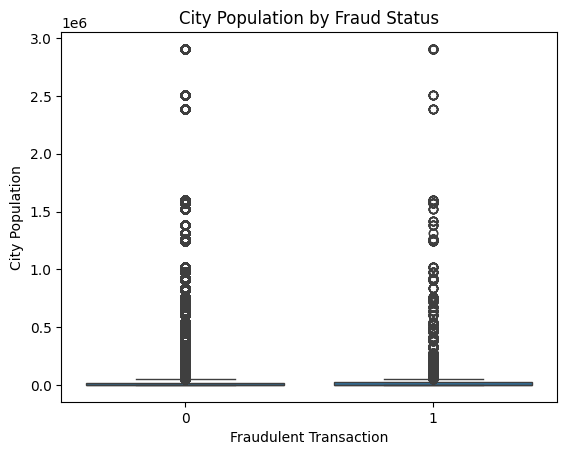

In [6]:
sns.boxplot(x="is_fraud", y="city_pop", data=df)
plt.xlabel("Fraudulent Transaction")
plt.ylabel("City Population")
plt.title("City Population by Fraud Status")
plt.show()


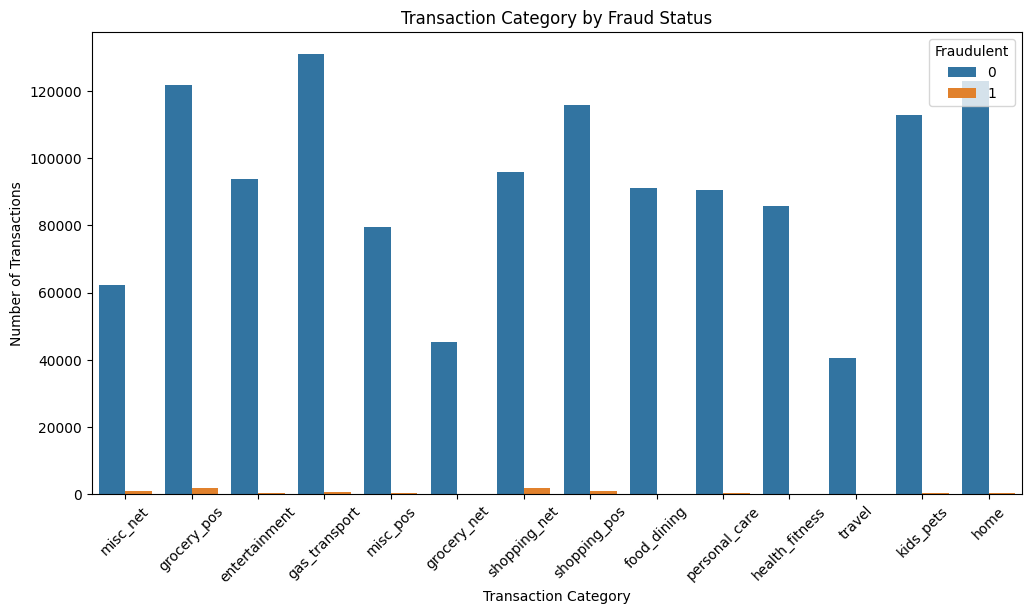

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x="category", hue="is_fraud", data=df)
plt.xlabel("Transaction Category")
plt.ylabel("Number of Transactions")
plt.title("Transaction Category by Fraud Status")
plt.xticks(rotation=45)
plt.legend(title="Fraudulent")
plt.show()


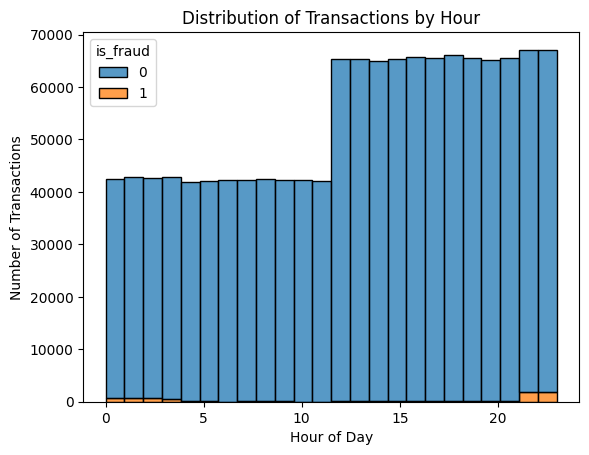

In [8]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["hour"] = df["trans_date_trans_time"].dt.hour

sns.histplot(data=df, x="hour", hue="is_fraud", multiple="stack", bins=24)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Transactions by Hour")
plt.show()


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/1220559202.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_percent_by_gender, x='Gender', y='Fraud Percentage', palette='pastel')


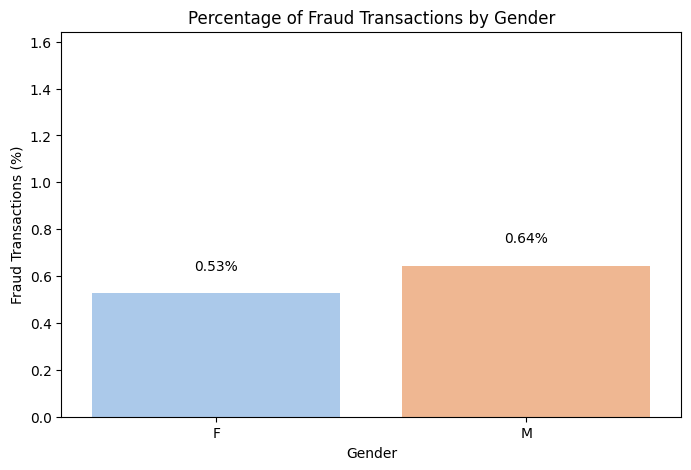

In [9]:


# Расчёт как ранее
fraud_df = df[df['is_fraud'] == 1]
fraud_by_gender = fraud_df['gender'].value_counts()
total_by_gender = df['gender'].value_counts()
fraud_percent_by_gender = (fraud_by_gender / total_by_gender) * 100
fraud_percent_by_gender = fraud_percent_by_gender.reset_index()
fraud_percent_by_gender.columns = ['Gender', 'Fraud Percentage']

# Построение графика
plt.figure(figsize=(8,5))
sns.barplot(data=fraud_percent_by_gender, x='Gender', y='Fraud Percentage', palette='pastel')
plt.title('Percentage of Fraud Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Transactions (%)')
plt.ylim(0, fraud_percent_by_gender['Fraud Percentage'].max() + 1)
for index, row in fraud_percent_by_gender.iterrows():
    plt.text(index, row['Fraud Percentage'] + 0.1, f"{row['Fraud Percentage']:.2f}%", ha='center')

plt.show()


In [10]:
df["gender"] = df["gender"].map({'M': 1, 'F': 0})


In [11]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0


In [12]:
df["job"].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [13]:
categories = {
    "IT": ['developer', 'programmer', 'software', 'data scientist', 'IT', 'systems analyst', 'network', 'database', 'web'],
    "Engineering": ['engineer', 'architect', 'mechanical', 'electrical', 'civil'],
    "Healthcare": ['nurse', 'doctor', 'therapist', 'psychologist', 'physician', 'health', 'medical'],
    "Education": ['teacher', 'lecturer', 'tutor', 'professor', 'education'],
    "Arts": ['artist', 'illustrator', 'musician', 'actor', 'dancer', 'designer', 'photographer'],
    "Finance": ['accountant', 'banker', 'finance', 'investment', 'auditor'],
    "Legal": ['lawyer', 'solicitor', 'attorney', 'barrister', 'judge'],
    "Hospitality": ['hotel', 'restaurant', 'hospitality', 'chef', 'catering'],
    "Science": ['scientist', 'research', 'physicist', 'chemist', 'biologist'],
    "Other": []  
}


def categorize_job(job_title):
    if pd.isnull(job_title):
        return "Other"
    job_lower = job_title.lower()
    for category, keywords in categories.items():
        if any(keyword in job_lower for keyword in keywords):
            return category
    return "Other"


df['job_category'] = df['job'].apply(categorize_job)

In [14]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,job_category
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Healthcare
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Education
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Other
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Legal
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Healthcare


In [15]:
df.category.unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [16]:
from datetime import datetime

df['dob'] = pd.to_datetime(df['dob'], errors='coerce')


df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')


def calculate_age(born, ref_date):
    if pd.isnull(born) or pd.isnull(ref_date):
        return None
    age = ref_date.year - born.year - ((ref_date.month, ref_date.day) < (born.month, born.day))
    return age


df['age_at_transaction'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date_trans_time']), axis=1)

In [17]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,job_category,age_at_transaction
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Healthcare,30
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Education,40
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Other,56
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Legal,51
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Healthcare,32


In [18]:
df["merchant"].unique()

array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
       'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
       'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
       'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
       'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
       'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
       'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
       'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
       'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
       'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
       'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
       'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
       'fraud_Bruen-Yost', 'fraud_Kunze Inc',
       'fraud_Nitzsche, Kessler and Wolff',
       'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
       'fraud_Balistreri-Nader', 'fraud_Bahrin

In [19]:
unique_merchants = df['merchant'].nunique()
print(f"Number of unique merchants: {unique_merchants}")


Number of unique merchants: 693


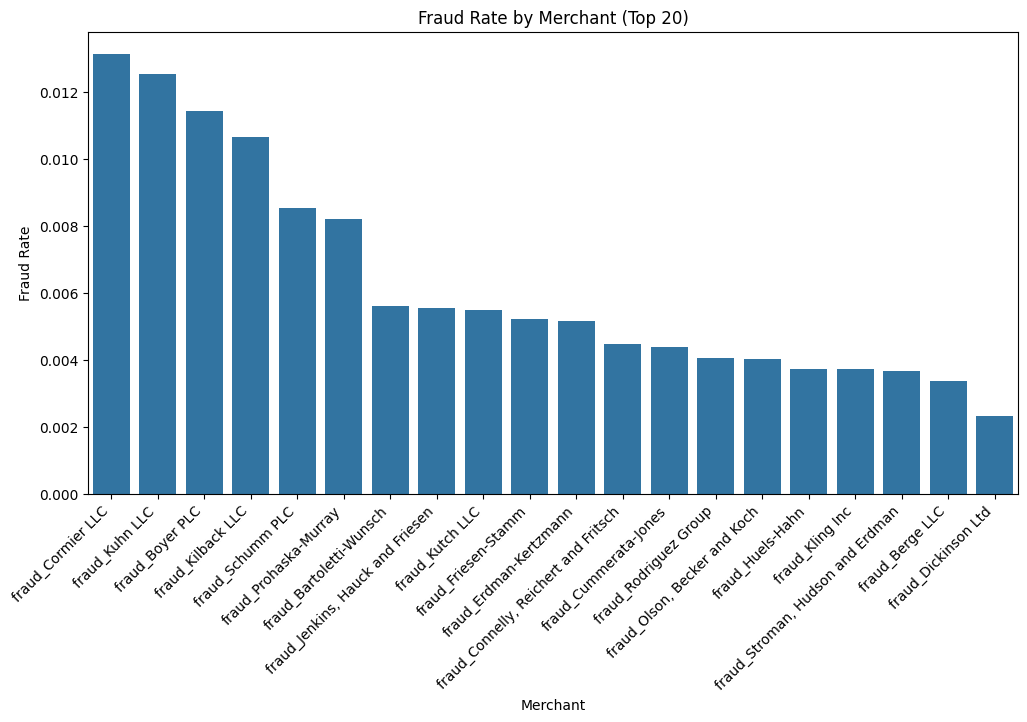

In [20]:
# Count the number of records by merchants
counts = df['merchant'].value_counts()
top_merchants = counts.nlargest(20).index

# Filter the dataframe to include only top merchants
df_top = df[df['merchant'].isin(top_merchants)]

# Calculate the average value of the target variable (e.g., fraud=1 means fraud) by merchant
fraud_rate_by_merchant = df_top.groupby('merchant')['is_fraud'].mean().sort_values(ascending=False)

# Plot the barplot
plt.figure(figsize=(12,6))
sns.barplot(x=fraud_rate_by_merchant.index, y=fraud_rate_by_merchant.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Merchant')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Merchant (Top 20)')
plt.show()


In [21]:

from scipy.stats import chi2_contingency


def chi2_test(col_name):
    contingency = pd.crosstab(df[col_name], df['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\nChi-square test for {col_name}:")
    print(f"  Chi2 = {chi2:.4f}, p-value = {p:.4e}, dof = {dof}")
    if p < 0.05:
        print(f"  ✅ Statistically significant association between '{col_name}' and fraud.")
    else:
        print(f"  ❌ No statistically significant association between '{col_name}' and fraud.")


In [22]:
chi2_test('city')
chi2_test('job')
chi2_test('category')
chi2_test('state')
chi2_test('merchant')


Chi-square test for city:
  Chi2 = 104775.9965, p-value = 0.0000e+00, dof = 893
  ✅ Statistically significant association between 'city' and fraud.

Chi-square test for job:
  Chi2 = 39165.6185, p-value = 0.0000e+00, dof = 493
  ✅ Statistically significant association between 'job' and fraud.

Chi-square test for category:
  Chi2 = 6486.0033, p-value = 0.0000e+00, dof = 13
  ✅ Statistically significant association between 'category' and fraud.

Chi-square test for state:
  Chi2 = 1869.3404, p-value = 0.0000e+00, dof = 50
  ✅ Statistically significant association between 'state' and fraud.

Chi-square test for merchant:
  Chi2 = 6929.5861, p-value = 0.0000e+00, dof = 692
  ✅ Statistically significant association between 'merchant' and fraud.


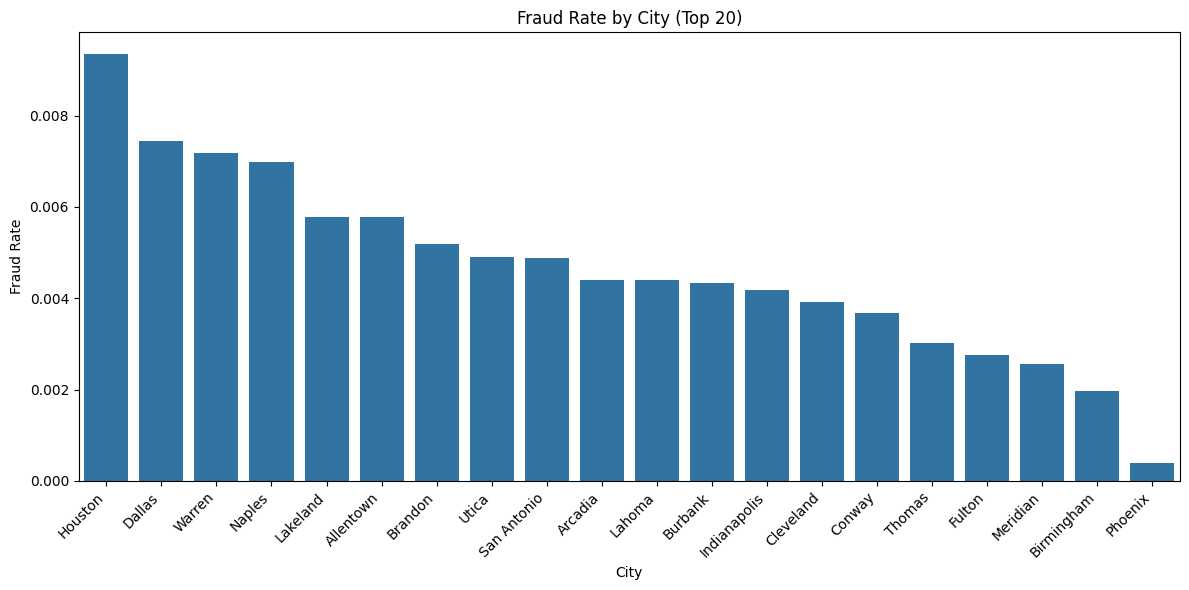

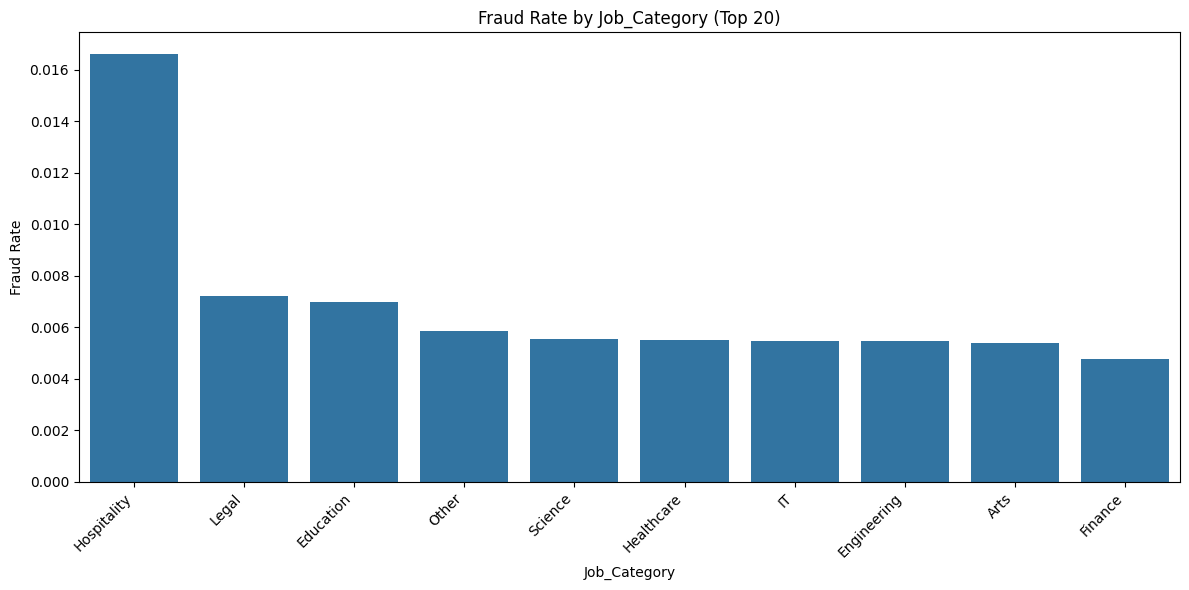

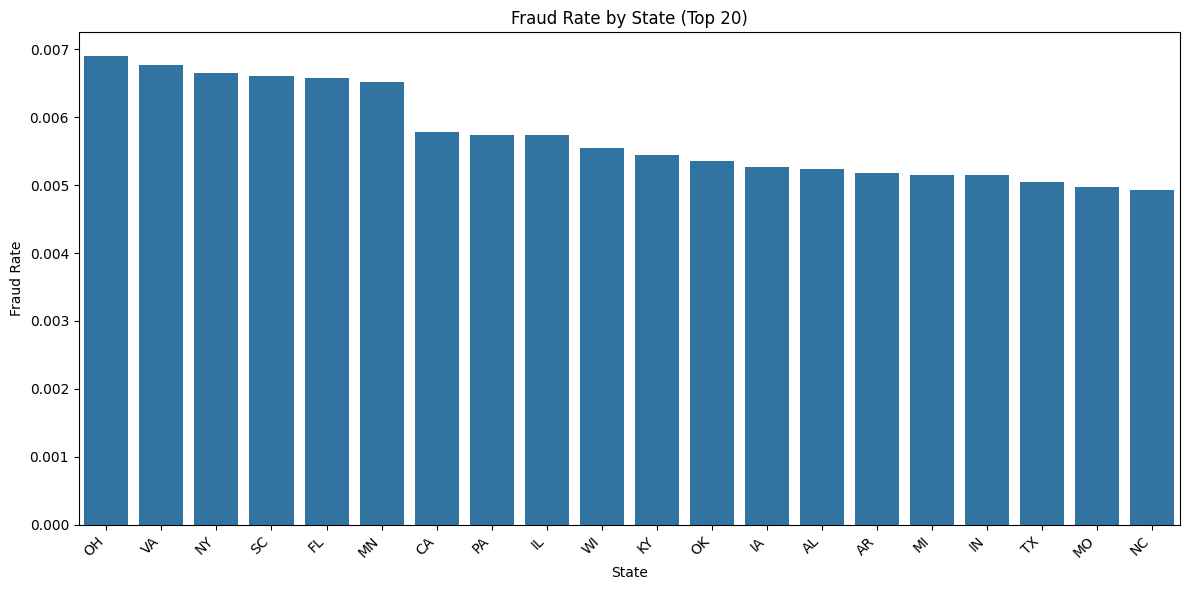

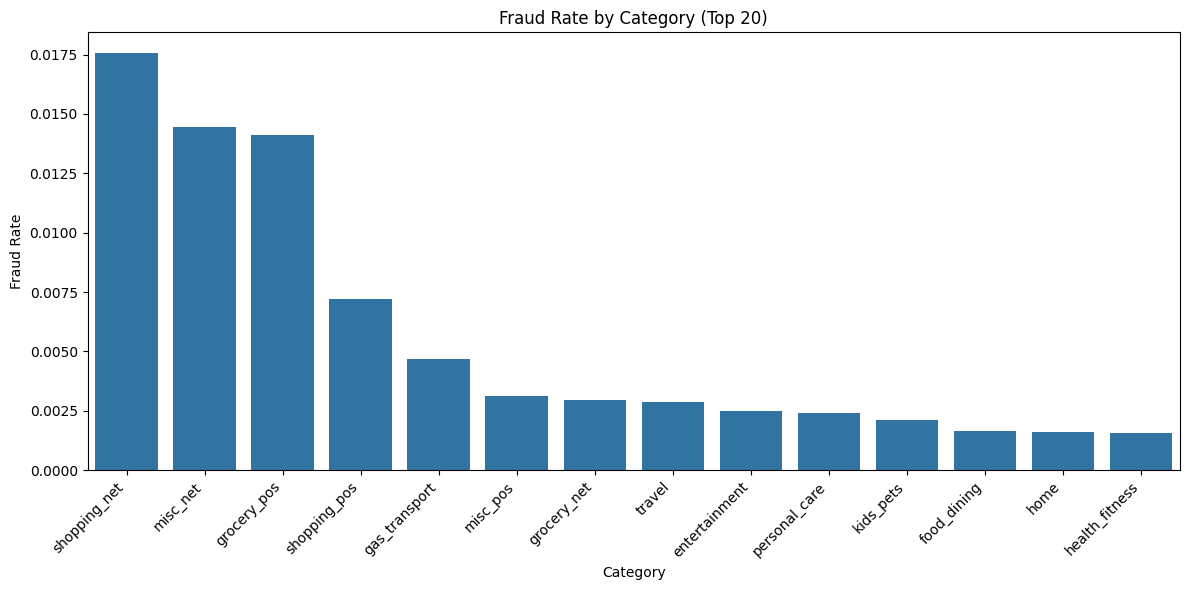

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_fraud_rate_by_feature(feature, top_n=20):
    top_values = df[feature].value_counts().nlargest(top_n).index
    df_top = df[df[feature].isin(top_values)]
    fraud_rates = df_top.groupby(feature)['is_fraud'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=fraud_rates.index, y=fraud_rates.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Fraud Rate by {feature.title()} (Top {top_n})')
    plt.ylabel('Fraud Rate')
    plt.xlabel(feature.title())
    plt.tight_layout()
    plt.show()

plot_fraud_rate_by_feature('city')
plot_fraud_rate_by_feature('job_category')
plot_fraud_rate_by_feature('state')
plot_fraud_rate_by_feature('category')


In [24]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))


In [25]:
print("Cramér’s V for job category:", cramers_v(df['job_category'], df['is_fraud']))
print("Cramér’s V for city:", cramers_v(df['city'], df['is_fraud']))
print("Cramér’s V for state:", cramers_v(df['state'], df['is_fraud']))
print("Cramér’s V for category:", cramers_v(df['category'], df['is_fraud']))
print("Cramér’s V for merchant:", cramers_v(df['merchant'], df['is_fraud']))


Cramér’s V for job category: 0.007236393967013384
Cramér’s V for city: 0.28425972470365063
Cramér’s V for state: 0.037968953370841926
Cramér’s V for category: 0.07072500922873913
Cramér’s V for merchant: 0.07310348448131467


| Feature          | Cramér’s V | Strength of Association | Interpretation                                                                                           |
| ---------------- | ---------- | ----------------------- | -------------------------------------------------------------------------------------------------------- |
| **city**         | 0.284      | 🟡 **Moderate**         | Moderate association with the target variable `is_fraud`, informative — should be used.                  |
| **merchant**     | 0.073      | 🔵 **Weak**             | Weak but statistically significant association. Can be useful with target encoding or limiting to top-N. |
| **category**     | 0.071      | 🔵 **Weak**             | Similar case, consider using target or frequency encoding.                                               |
| **state**        | 0.038      | ⚪ **Very Weak**         | Very little influence — could be excluded.                                                               |
| **job category** | 0.0072     | ⚪ **Negligible**        | Almost no association with fraud — **better to drop this feature**.                                      |


In [26]:
df = df.drop(columns=['first', 'last', 'trans_num', 'street'])

In [27]:
df = df.drop(columns = ['job', 'job_category'])

In [28]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,hour,age_at_transaction
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,0,Moravian Falls,NC,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0,0,30
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,Orient,WA,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0,0,40
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,1,Malad City,ID,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0,0,56
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1,Boulder,MT,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0,0,51
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,1,Doe Hill,VA,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0,0,32


In [29]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['year'] = df['trans_date_trans_time'].dt.year

In [30]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,...,unix_time,merch_lat,merch_long,is_fraud,hour,age_at_transaction,day_of_week,month,is_weekend,year
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,0,Moravian Falls,NC,28654,...,1325376018,36.011293,-82.048315,0,0,30,1,1,0,2019
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,Orient,WA,99160,...,1325376044,49.159047,-118.186462,0,0,40,1,1,0,2019
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,1,Malad City,ID,83252,...,1325376051,43.150704,-112.154481,0,0,56,1,1,0,2019
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1,Boulder,MT,59632,...,1325376076,47.034331,-112.561071,0,0,51,1,1,0,2019
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,1,Doe Hill,VA,24433,...,1325376186,38.674999,-78.632459,0,0,32,1,1,0,2019


In [31]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['hour'].apply(time_of_day)


In [32]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

df['season'] = df['month'].apply(month_to_season)


In [33]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,...,merch_long,is_fraud,hour,age_at_transaction,day_of_week,month,is_weekend,year,time_of_day,season
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,0,Moravian Falls,NC,28654,...,-82.048315,0,0,30,1,1,0,2019,night,winter
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,0,Orient,WA,99160,...,-118.186462,0,0,40,1,1,0,2019,night,winter
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,1,Malad City,ID,83252,...,-112.154481,0,0,56,1,1,0,2019,night,winter
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,1,Boulder,MT,59632,...,-112.561071,0,0,51,1,1,0,2019,night,winter
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,1,Doe Hill,VA,24433,...,-78.632459,0,0,32,1,1,0,2019,night,winter


In [34]:
print("Cramér’s V for time of day:", cramers_v(df['time_of_day'], df['is_fraud']))
print("Cramér’s V for season:", cramers_v(df['season'], df['is_fraud']))



Cramér’s V for time of day: 0.08940433060787979
Cramér’s V for season: 0.011012873764163836


In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['category', 'gender', 'time_of_day']:
    df[col] = le.fit_transform(df[col])


In [36]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,...,merch_long,is_fraud,hour,age_at_transaction,day_of_week,month,is_weekend,year,time_of_day,season
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.97,0,Moravian Falls,NC,28654,...,-82.048315,0,0,30,1,1,0,2019,3,winter
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.23,0,Orient,WA,99160,...,-118.186462,0,0,40,1,1,0,2019,3,winter
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0,220.11,1,Malad City,ID,83252,...,-112.154481,0,0,56,1,1,0,2019,3,winter
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,45.00,1,Boulder,MT,59632,...,-112.561071,0,0,51,1,1,0,2019,3,winter
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,9,41.96,1,Doe Hill,VA,24433,...,-78.632459,0,0,32,1,1,0,2019,3,winter


In [37]:
basic_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "missing_values": df.isnull().sum(),
    "data_types": df.dtypes
}

print(basic_info)

{'shape': (1296675, 26), 'columns': ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'age_at_transaction', 'day_of_week', 'month', 'is_weekend', 'year', 'time_of_day', 'season'], 'missing_values': Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hour                     0
age_at_transaction       0
day_of_week              0
month                    0
is_weekend               0
year                  

In [38]:
print(df.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'hour',
       'age_at_transaction', 'day_of_week', 'month', 'is_weekend', 'year',
       'time_of_day', 'season'],
      dtype='object')


In [39]:
df = df.drop(columns=['cc_num', 'dob'])

In [40]:
df.head()

,Unnamed: 0,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,...,merch_long,is_fraud,hour,age_at_transaction,day_of_week,month,is_weekend,year,time_of_day,season
0,0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",8,4.97,0,Moravian Falls,NC,28654,36.0788,...,-82.048315,0,0,30,1,1,0,2019,3,winter
1,1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",4,107.23,0,Orient,WA,99160,48.8878,...,-118.186462,0,0,40,1,1,0,2019,3,winter
2,2,2019-01-01 00:00:51,fraud_Lind-Buckridge,0,220.11,1,Malad City,ID,83252,42.1808,...,-112.154481,0,0,56,1,1,0,2019,3,winter
3,3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",2,45.00,1,Boulder,MT,59632,46.2306,...,-112.561071,0,0,51,1,1,0,2019,3,winter
4,4,2019-01-01 00:03:06,fraud_Keeling-Crist,9,41.96,1,Doe Hill,VA,24433,38.4207,...,-78.632459,0,0,32,1,1,0,2019,3,winter


In [41]:
df = df.drop(columns=['unix_time'])

In [42]:
df = df.drop(columns='trans_date_trans_time')

In [43]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,merch_long,is_fraud,hour,age_at_transaction,day_of_week,month,is_weekend,year,time_of_day,season
0,0,"fraud_Rippin, Kub and Mann",8,4.97,0,Moravian Falls,NC,28654,36.0788,-81.1781,...,-82.048315,0,0,30,1,1,0,2019,3,winter
1,1,"fraud_Heller, Gutmann and Zieme",4,107.23,0,Orient,WA,99160,48.8878,-118.2105,...,-118.186462,0,0,40,1,1,0,2019,3,winter
2,2,fraud_Lind-Buckridge,0,220.11,1,Malad City,ID,83252,42.1808,-112.2620,...,-112.154481,0,0,56,1,1,0,2019,3,winter
3,3,"fraud_Kutch, Hermiston and Farrell",2,45.00,1,Boulder,MT,59632,46.2306,-112.1138,...,-112.561071,0,0,51,1,1,0,2019,3,winter
4,4,fraud_Keeling-Crist,9,41.96,1,Doe Hill,VA,24433,38.4207,-79.4629,...,-78.632459,0,0,32,1,1,0,2019,3,winter


In [44]:
df = df.drop(columns=['season'])

In [45]:
for col in ['merchant', 'city', 'state']:
    df[col] = df[col].astype('category')


In [46]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,merch_lat,merch_long,is_fraud,hour,age_at_transaction,day_of_week,month,is_weekend,year,time_of_day
0,0,"fraud_Rippin, Kub and Mann",8,4.97,0,Moravian Falls,NC,28654,36.0788,-81.1781,...,36.011293,-82.048315,0,0,30,1,1,0,2019,3
1,1,"fraud_Heller, Gutmann and Zieme",4,107.23,0,Orient,WA,99160,48.8878,-118.2105,...,49.159047,-118.186462,0,0,40,1,1,0,2019,3
2,2,fraud_Lind-Buckridge,0,220.11,1,Malad City,ID,83252,42.1808,-112.2620,...,43.150704,-112.154481,0,0,56,1,1,0,2019,3
3,3,"fraud_Kutch, Hermiston and Farrell",2,45.00,1,Boulder,MT,59632,46.2306,-112.1138,...,47.034331,-112.561071,0,0,51,1,1,0,2019,3
4,4,fraud_Keeling-Crist,9,41.96,1,Doe Hill,VA,24433,38.4207,-79.4629,...,38.674999,-78.632459,0,0,32,1,1,0,2019,3


In [47]:


# Создаем бины по сумме транзакций (amt)
# Можно настроить количество бинов, например 10
df['amt_bin'] = pd.cut(df['amt'], bins=10)

# Группируем по бинам и считаем среднее значение is_fraud (доля мошенничества)
fraud_rate_by_amt_bin = df.groupby('amt_bin')['is_fraud'].mean().reset_index()

# Смотрим на результат
print(fraud_rate_by_amt_bin)


                amt_bin  is_fraud
0    (-27.948, 2895.79]   0.00579
1    (2895.79, 5790.58]   0.00000
2    (5790.58, 8685.37]   0.00000
3   (8685.37, 11580.16]   0.00000
4  (11580.16, 14474.95]   0.00000
5  (14474.95, 17369.74]   0.00000
6  (17369.74, 20264.53]   0.00000
7  (20264.53, 23159.32]       NaN
8  (23159.32, 26054.11]   0.00000
9   (26054.11, 28948.9]   0.00000


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/177132492.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_amt_bin = df.groupby('amt_bin')['is_fraud'].mean().reset_index()


In [48]:
count_by_amt_bin = df['amt_bin'].value_counts().sort_index()
print(count_by_amt_bin)


amt_bin
(-27.948, 2895.79]      1296299
(2895.79, 5790.58]          273
(5790.58, 8685.37]           54
(8685.37, 11580.16]          23
(11580.16, 14474.95]         15
(14474.95, 17369.74]          5
(17369.74, 20264.53]          1
(20264.53, 23159.32]          0
(23159.32, 26054.11]          1
(26054.11, 28948.9]           4
Name: count, dtype: int64


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/182184989.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_amt_bin_q = df.groupby('amt_bin_q')['is_fraud'].mean().reset_index()
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/182184989.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='amt_bin_q', y='is_fraud', data=fraud_rate_by_amt_bin_q, palette='viridis')


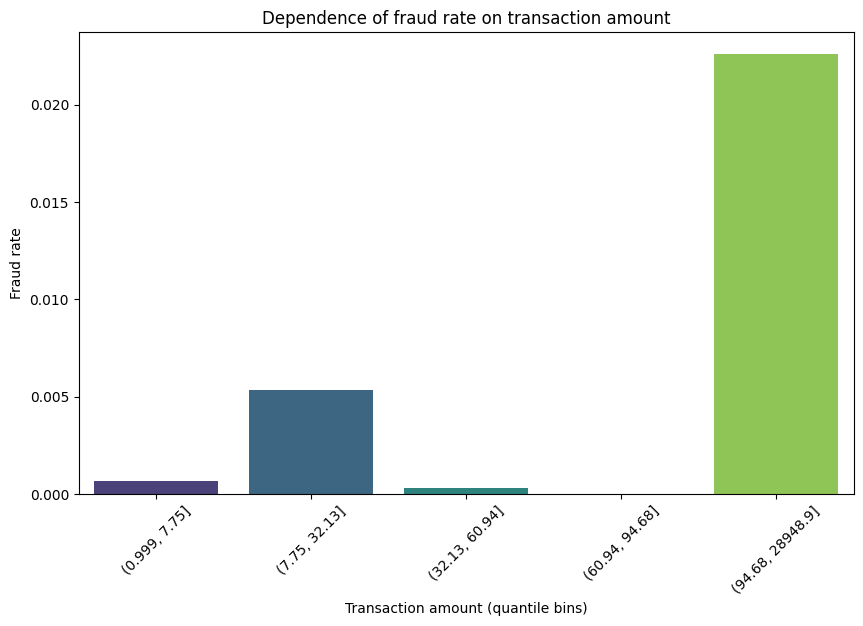

In [49]:
# Create quantiles (5 groups)
quantiles = df['amt'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1])
df['amt_bin_q'] = pd.cut(df['amt'], bins=quantiles, include_lowest=True)

# Group by the new bins and calculate the average fraud rate
fraud_rate_by_amt_bin_q = df.groupby('amt_bin_q')['is_fraud'].mean().reset_index()

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='amt_bin_q', y='is_fraud', data=fraud_rate_by_amt_bin_q, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Transaction amount (quantile bins)')
plt.ylabel('Fraud rate')
plt.title('Dependence of fraud rate on transaction amount')
plt.show()


In [50]:
import numpy as np
df['log_amt'] = np.log1p(df['amt'])  # log(amt + 1), чтобы не было проблем с нулями


bins = 10
df['log_amt_bin'] = pd.qcut(df['log_amt'], bins)

fraud_rate = df.groupby('log_amt_bin')['is_fraud'].mean().reset_index()
counts = df['log_amt_bin'].value_counts().sort_index()

fraud_rate['count'] = counts.values

/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/902681968.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('log_amt_bin')['is_fraud'].mean().reset_index()


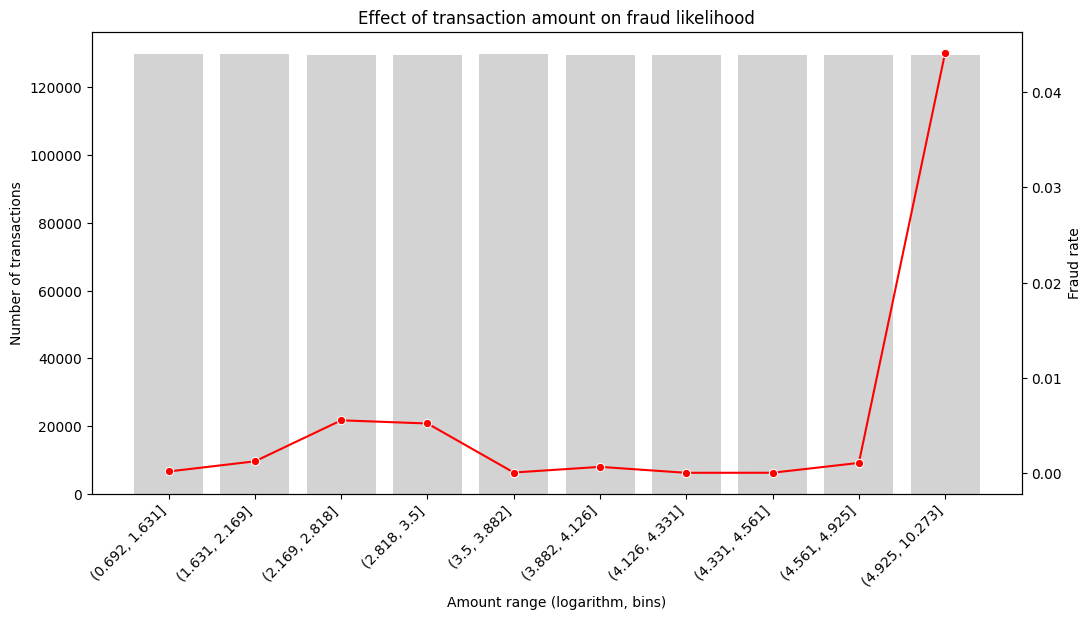

In [51]:
# Add a numeric index for the X axis
fraud_rate['bin_num'] = range(len(fraud_rate))

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

sns.barplot(x='bin_num', y='count', data=fraud_rate, ax=ax1, color='lightgray')
sns.lineplot(x='bin_num', y='is_fraud', data=fraud_rate, ax=ax2, marker='o', color='red')

ax1.set_xticks(fraud_rate['bin_num'])
ax1.set_xticklabels(fraud_rate['log_amt_bin'].astype(str), rotation=45, ha='right')
ax1.set_xlabel('Amount range (logarithm, bins)')
ax1.set_ylabel('Number of transactions')
ax2.set_ylabel('Fraud rate')
plt.title('Effect of transaction amount on fraud likelihood')
plt.show()


In [52]:
df.head()

,Unnamed: 0,merchant,category,amt,gender,city,state,zip,lat,long,...,age_at_transaction,day_of_week,month,is_weekend,year,time_of_day,amt_bin,amt_bin_q,log_amt,log_amt_bin
0,0,"fraud_Rippin, Kub and Mann",8,4.97,0,Moravian Falls,NC,28654,36.0788,-81.1781,...,30,1,1,0,2019,3,"(-27.948, 2895.79]","(0.999, 7.75]",1.786747,"(1.631, 2.169]"
1,1,"fraud_Heller, Gutmann and Zieme",4,107.23,0,Orient,WA,99160,48.8878,-118.2105,...,40,1,1,0,2019,3,"(-27.948, 2895.79]","(94.68, 28948.9]",4.684259,"(4.561, 4.925]"
2,2,fraud_Lind-Buckridge,0,220.11,1,Malad City,ID,83252,42.1808,-112.2620,...,56,1,1,0,2019,3,"(-27.948, 2895.79]","(94.68, 28948.9]",5.398660,"(4.925, 10.273]"
3,3,"fraud_Kutch, Hermiston and Farrell",2,45.00,1,Boulder,MT,59632,46.2306,-112.1138,...,51,1,1,0,2019,3,"(-27.948, 2895.79]","(32.13, 60.94]",3.828641,"(3.5, 3.882]"
4,4,fraud_Keeling-Crist,9,41.96,1,Doe Hill,VA,24433,38.4207,-79.4629,...,32,1,1,0,2019,3,"(-27.948, 2895.79]","(32.13, 60.94]",3.760269,"(3.5, 3.882]"


In [53]:
basic_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "missing_values": df.isnull().sum(),
    "data_types": df.dtypes
}

print(basic_info)

{'shape': (1296675, 25), 'columns': ['Unnamed: 0', 'merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'age_at_transaction', 'day_of_week', 'month', 'is_weekend', 'year', 'time_of_day', 'amt_bin', 'amt_bin_q', 'log_amt', 'log_amt_bin'], 'missing_values': Unnamed: 0            0
merchant              0
category              0
amt                   0
gender                0
city                  0
state                 0
zip                   0
lat                   0
long                  0
city_pop              0
merch_lat             0
merch_long            0
is_fraud              0
hour                  0
age_at_transaction    0
day_of_week           0
month                 0
is_weekend            0
year                  0
time_of_day           0
amt_bin               0
amt_bin_q             0
log_amt               0
log_amt_bin           0
dtype: int64, 'data_types': Unnamed: 0               int64

In [54]:
for col in ['amt_bin', 'amt_bin_q', 'log_amt_bin']:
    df[col] = le.fit_transform(df[col])

In [55]:
# Assume df is your full dataframe with the target column 'is_fraud'
# Adjust this if your dataframe or target column names differ
categorical_features = ['merchant', 'city', 'state', 'amt_bin', 'amt_bin_q', 'log_amt_bin']

for col in categorical_features:
    df[col] = df[col].astype('category')

In [56]:
basic_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "missing_values": df.isnull().sum(),
    "data_types": df.dtypes
}

print(basic_info)

{'shape': (1296675, 25), 'columns': ['Unnamed: 0', 'merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud', 'hour', 'age_at_transaction', 'day_of_week', 'month', 'is_weekend', 'year', 'time_of_day', 'amt_bin', 'amt_bin_q', 'log_amt', 'log_amt_bin'], 'missing_values': Unnamed: 0            0
merchant              0
category              0
amt                   0
gender                0
city                  0
state                 0
zip                   0
lat                   0
long                  0
city_pop              0
merch_lat             0
merch_long            0
is_fraud              0
hour                  0
age_at_transaction    0
day_of_week           0
month                 0
is_weekend            0
year                  0
time_of_day           0
amt_bin               0
amt_bin_q             0
log_amt               0
log_amt_bin           0
dtype: int64, 'data_types': Unnamed: 0               int64

In [57]:
df = df.drop(columns = ['Unnamed: 0', 'lat', 'long', 'merch_lat', 'merch_long', 'zip'])

In [58]:
categorical_features = ['merchant', 'city', 'state', 'amt_bin', 'amt_bin_q', 'log_amt_bin']

for col in categorical_features:
    print(f"Column: {col}")
    cats = df[col].cat.categories
    print(f"Categories type: {type(cats)}")
    print(f"Categories preview: {cats[:10]}")  # show first 10 categories
    # Also check if any category itself is complex object:
    for c in cats:
        if not isinstance(c, (str, int, float)):
            print(f"  Warning: category {c} in column {col} is a complex object of type {type(c)}")


Column: merchant
Categories type: <class 'pandas.core.indexes.base.Index'>
Categories preview: Index(['fraud_Abbott-Rogahn', 'fraud_Abbott-Steuber',
       'fraud_Abernathy and Sons', 'fraud_Abshire PLC',
       'fraud_Adams, Kovacek and Kuhlman', 'fraud_Adams-Barrows',
       'fraud_Altenwerth, Cartwright and Koss', 'fraud_Altenwerth-Kilback',
       'fraud_Ankunding LLC', 'fraud_Ankunding-Carroll'],
      dtype='object')
Column: city
Categories type: <class 'pandas.core.indexes.base.Index'>
Categories preview: Index(['Achille', 'Acworth', 'Adams', 'Afton', 'Akron', 'Albany',
       'Albuquerque', 'Alder', 'Aledo', 'Alexandria'],
      dtype='object')
Column: state
Categories type: <class 'pandas.core.indexes.base.Index'>
Categories preview: Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL'], dtype='object')
Column: amt_bin
Categories type: <class 'pandas.core.indexes.base.Index'>
Categories preview: Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Column: amt_bin_q
C

In [59]:
# Список категориальных колонок с IntervalIndex категориями
interval_cat_features = ['amt_bin', 'amt_bin_q', 'log_amt_bin']

for col in interval_cat_features:
    # Преобразуем категорию в строку
    df[col] = df[col].astype(str).astype('category')
    


In [60]:
import optuna
import lightgbm as lgb
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42, stratify=y_train_full
)


def find_best_threshold(y_true, y_probs):
    best_threshold = 0.5
    best_f1 = 0
    thresholds = np.linspace(0.1, 0.99, 90)
    for t in thresholds:
        preds = (y_probs > t).astype(int)
        f1 = f1_score(y_true, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
    return best_threshold, best_f1

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'average_precision',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'scale_pos_weight': trial.suggest_loguniform('scale_pos_weight', 1, 20),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-2, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-2, 10),
        'random_state': 42,
    }

    train_set = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
    valid_set = lgb.Dataset(X_valid, label=y_valid, categorical_feature=categorical_features)

    gbm = lgb.train(
        params,
        train_set,
        valid_sets=[valid_set],
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(50)]
    )

    y_probs = gbm.predict(X_valid, num_iteration=gbm.best_iteration)
    best_threshold, best_f1 = find_best_threshold(y_valid, y_probs)

    return best_f1

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs = 5, timeout=600)

print(f"Best parameters: {study.best_params}")
print(f"Best F1 on validation: {study.best_value:.4f}")

best_params = study.best_params
best_params.update({
    'objective': 'binary',
    'metric': 'average_precision',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'random_state': 42,
})

train_full_set = lgb.Dataset(X_train_full, label=y_train_full, categorical_feature=categorical_features)

final_model = lgb.train(
    best_params,
    train_full_set,
    num_boost_round=1000
)

y_probs_test = final_model.predict(X_test)
best_threshold_test, best_f1_test = find_best_threshold(y_test, y_probs_test)
y_pred_test = (y_probs_test > best_threshold_test).astype(int)

print(f"Best threshold on test: {best_threshold_test:.2f} (F1: {best_f1_test:.4f})")
print("Classification report on test:")
print(classification_report(y_test, y_pred_test))


/Users/kseniasmirnova/Desktop/add_final_project/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-29 17:15:39,102] A new study created in memory with name: no-name-60a60d35-bf42-406e-a37a-8e2f9bb434f2
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

Training until validation scores don't improve for 50 rounds
Training until validation scores don't improve for 50 rounds
Training until validation scores don't improve for 50 rounds
Training until validation scores don't improve for 50 rounds
Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.805363
[50]	valid_0's average_precision: 0.807972
[50]	valid_0's average_precision: 0.834207
[50]	valid_0's average_precision: 0.813228
[100]	valid_0's average_precision: 0.818528
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.818528


[I 2025-05-29 17:15:43,887] Trial 1 finished with value: 0.7808471454880295 and parameters: {'max_depth': 5, 'num_leaves': 139, 'learning_rate': 0.002578851197478113, 'feature_fraction': 0.5125314267158622, 'bagging_fraction': 0.6061438601132415, 'bagging_freq': 5, 'min_child_samples': 82, 'scale_pos_weight': 5.746379446136646, 'reg_alpha': 0.2617233884792289, 'reg_lambda': 0.41820368865323}. Best is trial 1 with value: 0.7808471454880295.


[100]	valid_0's average_precision: 0.819785
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.819785


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.86218
[100]	valid_0's average_precision: 0.839253
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.839253


[I 2025-05-29 17:15:45,294] Trial 4 finished with value: 0.8027681660899654 and parameters: {'max_depth': 6, 'num_leaves': 65, 'learning_rate': 0.001463858993794665, 'feature_fraction': 0.9837822756154107, 'bagging_fraction': 0.8644410427343779, 'bagging_freq': 7, 'min_child_samples': 91, 'scale_pos_weight': 10.29917975839528, 'reg_alpha': 0.16991996462846987, 'reg_lambda': 0.03245760482866224}. Best is trial 4 with value: 0.8027681660899654.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.823357
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.823357
[50]	valid_0's average_precision: 0.801981


[I 2025-05-29 17:15:46,352] Trial 0 finished with value: 0.7712418300653595 and parameters: {'max_depth': 7, 'num_leaves': 141, 'learning_rate': 0.00507312367892405, 'feature_fraction': 0.7351147745138198, 'bagging_fraction': 0.6895468548083332, 'bagging_freq': 2, 'min_child_samples': 41, 'scale_pos_weight': 3.8128273957750234, 'reg_alpha': 2.2273069459027695, 'reg_lambda': 2.9857646170724954}. Best is trial 4 with value: 0.8027681660899654.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.864263
[100]	valid_0's average_precision: 0.798544
Did not meet early stopping. Best iteration is:
[54]	valid_0's average_precision: 0.802723


[I 2025-05-29 17:15:48,183] Trial 6 finished with value: 0.7595171773444754 and parameters: {'max_depth': 5, 'num_leaves': 145, 'learning_rate': 0.0036687747665085394, 'feature_fraction': 0.8433122782933495, 'bagging_fraction': 0.8455520395280696, 'bagging_freq': 6, 'min_child_samples': 72, 'scale_pos_weight': 4.628199660470804, 'reg_alpha': 0.3550608412324517, 'reg_lambda': 0.14363349679235293}. Best is trial 4 with value: 0.8027681660899654.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.882542
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.882542


[I 2025-05-29 17:15:50,168] Trial 3 finished with value: 0.8327272727272728 and parameters: {'max_depth': 12, 'num_leaves': 78, 'learning_rate': 0.017834545350644354, 'feature_fraction': 0.5061001406983932, 'bagging_fraction': 0.5665777639955161, 'bagging_freq': 8, 'min_child_samples': 49, 'scale_pos_weight': 2.684678011791939, 'reg_alpha': 0.09556551646065009, 'reg_lambda': 0.012449253563709944}. Best is trial 3 with value: 0.8327272727272728.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See 

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.811364
[100]	valid_0's average_precision: 0.866554
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.866554


[I 2025-05-29 17:15:51,776] Trial 5 finished with value: 0.8405797101449275 and parameters: {'max_depth': 7, 'num_leaves': 118, 'learning_rate': 0.005518326083109762, 'feature_fraction': 0.8745715865753751, 'bagging_fraction': 0.5434523604169116, 'bagging_freq': 9, 'min_child_samples': 91, 'scale_pos_weight': 1.2246968989986775, 'reg_alpha': 0.011422237093229017, 'reg_lambda': 0.024285542150011104}. Best is trial 5 with value: 0.8405797101449275.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. Se

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.83704
[50]	valid_0's average_precision: 0.878676
[50]	valid_0's average_precision: 0.868997
[50]	valid_0's average_precision: 0.8334
[100]	valid_0's average_precision: 0.845435
Did not meet early stopping. Best iteration is:
[99]	valid_0's average_precision: 0.845441
[100]	valid_0's average_precision: 0.83332
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.83332


[I 2025-05-29 17:15:56,555] Trial 10 finished with value: 0.8015267175572519 and parameters: {'max_depth': 6, 'num_leaves': 88, 'learning_rate': 0.0019773166659782936, 'feature_fraction': 0.6046164807997718, 'bagging_fraction': 0.6989949116663862, 'bagging_freq': 6, 'min_child_samples': 11, 'scale_pos_weight': 1.3893975770950624, 'reg_alpha': 0.21686203689496564, 'reg_lambda': 0.09741651096175571}. Best is trial 5 with value: 0.8405797101449275.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

Training until validation scores don't improve for 50 rounds
Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.841647
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.841647


[I 2025-05-29 17:15:58,077] Trial 11 finished with value: 0.7996530789245446 and parameters: {'max_depth': 7, 'num_leaves': 90, 'learning_rate': 0.020364332082049866, 'feature_fraction': 0.9963367441859136, 'bagging_fraction': 0.546152800641907, 'bagging_freq': 6, 'min_child_samples': 16, 'scale_pos_weight': 4.958069192206501, 'reg_alpha': 1.465454115844373, 'reg_lambda': 0.012731737365347776}. Best is trial 5 with value: 0.8405797101449275.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.760626
[100]	valid_0's average_precision: 0.880309
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.880309


[I 2025-05-29 17:16:00,478] Trial 9 finished with value: 0.8397212543554007 and parameters: {'max_depth': 11, 'num_leaves': 115, 'learning_rate': 0.005954632984737542, 'feature_fraction': 0.7551400668737711, 'bagging_fraction': 0.6328704686620203, 'bagging_freq': 1, 'min_child_samples': 39, 'scale_pos_weight': 5.341118711660806, 'reg_alpha': 0.08985622562301758, 'reg_lambda': 0.2971795706949455}. Best is trial 5 with value: 0.8405797101449275.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.893912
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.893912
[100]	valid_0's average_precision: 0.829054
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.829054
[50]	valid_0's average_precision: 0.850987


[I 2025-05-29 17:16:01,379] Trial 8 finished with value: 0.8541114058355438 and parameters: {'max_depth': 14, 'num_leaves': 137, 'learning_rate': 0.027702241408557357, 'feature_fraction': 0.7498302848805926, 'bagging_fraction': 0.7577144774999829, 'bagging_freq': 6, 'min_child_samples': 37, 'scale_pos_weight': 2.786707102661283, 'reg_alpha': 0.17723536798565537, 'reg_lambda': 0.025238050354823138}. Best is trial 8 with value: 0.8541114058355438.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

Training until validation scores don't improve for 50 rounds
Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.761631
[100]	valid_0's average_precision: 0.779191
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.779191


[I 2025-05-29 17:16:03,548] Trial 16 finished with value: 0.7564102564102564 and parameters: {'max_depth': 3, 'num_leaves': 112, 'learning_rate': 0.060419438273517395, 'feature_fraction': 0.8731311616266028, 'bagging_fraction': 0.7717786095591899, 'bagging_freq': 10, 'min_child_samples': 67, 'scale_pos_weight': 1.0391650615046006, 'reg_alpha': 0.01031522944676881, 'reg_lambda': 0.028946130671623195}. Best is trial 8 with value: 0.8541114058355438.


[50]	valid_0's average_precision: 0.867105


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.865085
[100]	valid_0's average_precision: 0.8631
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.8631


[I 2025-05-29 17:16:06,114] Trial 12 finished with value: 0.8167539267015707 and parameters: {'max_depth': 8, 'num_leaves': 130, 'learning_rate': 0.004906962911439276, 'feature_fraction': 0.7801708749397278, 'bagging_fraction': 0.7551461123079997, 'bagging_freq': 1, 'min_child_samples': 100, 'scale_pos_weight': 9.000342046350317, 'reg_alpha': 0.03083522255288329, 'reg_lambda': 0.3964464585096463}. Best is trial 8 with value: 0.8541114058355438.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See 

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.880021
[100]	valid_0's average_precision: 0.880231
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.880231


[I 2025-05-29 17:16:09,579] Trial 14 finished with value: 0.8478847884788479 and parameters: {'max_depth': 10, 'num_leaves': 112, 'learning_rate': 0.09085590408774954, 'feature_fraction': 0.8574050916053746, 'bagging_fraction': 0.9937771741406067, 'bagging_freq': 10, 'min_child_samples': 99, 'scale_pos_weight': 1.374385507082284, 'reg_alpha': 0.01155635661809828, 'reg_lambda': 0.7782814914937674}. Best is trial 8 with value: 0.8541114058355438.


[50]	valid_0's average_precision: 0.871706


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.877222
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.877222


[I 2025-05-29 17:16:11,352] Trial 15 finished with value: 0.8297872340425532 and parameters: {'max_depth': 10, 'num_leaves': 112, 'learning_rate': 0.06724146830081804, 'feature_fraction': 0.8485979360146485, 'bagging_fraction': 0.6552879341179702, 'bagging_freq': 10, 'min_child_samples': 71, 'scale_pos_weight': 1.406905649546586, 'reg_alpha': 0.011877858983071919, 'reg_lambda': 0.8304658045087149}. Best is trial 8 with value: 0.8541114058355438.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.879768
[100]	valid_0's average_precision: 0.885438
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.885438


[I 2025-05-29 17:16:13,196] Trial 17 finished with value: 0.8472727272727273 and parameters: {'max_depth': 10, 'num_leaves': 111, 'learning_rate': 0.07023833488402326, 'feature_fraction': 0.879286536804658, 'bagging_fraction': 0.7757134501098804, 'bagging_freq': 10, 'min_child_samples': 67, 'scale_pos_weight': 1.0064468622192437, 'reg_alpha': 0.010269117692999137, 'reg_lambda': 0.035588112704034}. Best is trial 8 with value: 0.8541114058355438.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See 

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.88127
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.88127


[I 2025-05-29 17:16:15,874] Trial 18 finished with value: 0.8385416666666666 and parameters: {'max_depth': 15, 'num_leaves': 105, 'learning_rate': 0.04515139579492193, 'feature_fraction': 0.8708043260640682, 'bagging_fraction': 0.7717423141882179, 'bagging_freq': 4, 'min_child_samples': 24, 'scale_pos_weight': 2.085064269845238, 'reg_alpha': 0.03275896595653012, 'reg_lambda': 0.8417415520190362}. Best is trial 8 with value: 0.8541114058355438.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

[50]	valid_0's average_precision: 0.836175
Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.861675
[50]	valid_0's average_precision: 0.85954
[100]	valid_0's average_precision: 0.894406
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.894406


[I 2025-05-29 17:16:18,703] Trial 19 finished with value: 0.8584149599287623 and parameters: {'max_depth': 15, 'num_leaves': 105, 'learning_rate': 0.06484329540183552, 'feature_fraction': 0.897713812177939, 'bagging_fraction': 0.9988818675845431, 'bagging_freq': 4, 'min_child_samples': 23, 'scale_pos_weight': 1.9634400222474664, 'reg_alpha': 0.0327430492628678, 'reg_lambda': 0.036372645442728585}. Best is trial 19 with value: 0.8584149599287623.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.855765
[100]	valid_0's average_precision: 0.887211
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.887211


[I 2025-05-29 17:16:20,443] Trial 22 finished with value: 0.8548812664907651 and parameters: {'max_depth': 15, 'num_leaves': 48, 'learning_rate': 0.036610640550671196, 'feature_fraction': 0.9331238824099024, 'bagging_fraction': 0.9655857096648524, 'bagging_freq': 4, 'min_child_samples': 28, 'scale_pos_weight': 1.8639399983683596, 'reg_alpha': 0.03562120826151768, 'reg_lambda': 1.1950722304726122}. Best is trial 19 with value: 0.8584149599287623.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.872934
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.872934
[50]	valid_0's average_precision: 0.878521


[I 2025-05-29 17:16:22,753] Trial 20 finished with value: 0.8408304498269896 and parameters: {'max_depth': 15, 'num_leaves': 101, 'learning_rate': 0.09413233005718465, 'feature_fraction': 0.6586738518230805, 'bagging_fraction': 0.9746109826192231, 'bagging_freq': 3, 'min_child_samples': 26, 'scale_pos_weight': 1.9998733818133652, 'reg_alpha': 0.043437066099214265, 'reg_lambda': 1.278081578822517}. Best is trial 19 with value: 0.8584149599287623.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.875076
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.875076
[100]	valid_0's average_precision: 0.883752
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.883752


[I 2025-05-29 17:16:23,921] Trial 23 finished with value: 0.8515021459227468 and parameters: {'max_depth': 13, 'num_leaves': 49, 'learning_rate': 0.09659490355457381, 'feature_fraction': 0.672434376255869, 'bagging_fraction': 0.9850990800537889, 'bagging_freq': 3, 'min_child_samples': 29, 'scale_pos_weight': 2.032530320688572, 'reg_alpha': 0.7264713622487243, 'reg_lambda': 1.5427396297109424}. Best is trial 19 with value: 0.8584149599287623.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

[50]	valid_0's average_precision: 0.837699


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.891802
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.891802


[I 2025-05-29 17:16:26,299] Trial 24 finished with value: 0.8497316636851521 and parameters: {'max_depth': 13, 'num_leaves': 53, 'learning_rate': 0.03482819076222934, 'feature_fraction': 0.9306693343728702, 'bagging_fraction': 0.9170931784034169, 'bagging_freq': 4, 'min_child_samples': 27, 'scale_pos_weight': 2.1841940022341264, 'reg_alpha': 0.6152051147731463, 'reg_lambda': 0.05835977442654092}. Best is trial 19 with value: 0.8584149599287623.


[50]	valid_0's average_precision: 0.8846


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.861634
[100]	valid_0's average_precision: 0.874176
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.874176


[I 2025-05-29 17:16:27,641] Trial 25 finished with value: 0.824468085106383 and parameters: {'max_depth': 13, 'num_leaves': 46, 'learning_rate': 0.035352181321777594, 'feature_fraction': 0.9404321262856822, 'bagging_fraction': 0.9962519871532816, 'bagging_freq': 4, 'min_child_samples': 29, 'scale_pos_weight': 2.157430903863187, 'reg_alpha': 0.04006708140717163, 'reg_lambda': 2.286464417392583}. Best is trial 19 with value: 0.8584149599287623.


[50]	valid_0's average_precision: 0.846837


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.829932
[100]	valid_0's average_precision: 0.893238
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.893238


[I 2025-05-29 17:16:30,173] Trial 26 finished with value: 0.8561464690496948 and parameters: {'max_depth': 13, 'num_leaves': 50, 'learning_rate': 0.03592963452353798, 'feature_fraction': 0.9405771212045868, 'bagging_fraction': 0.9162799275296726, 'bagging_freq': 4, 'min_child_samples': 30, 'scale_pos_weight': 2.826612825971526, 'reg_alpha': 0.7294150995090108, 'reg_lambda': 0.055593884394176035}. Best is trial 19 with value: 0.8584149599287623.


[100]	valid_0's average_precision: 0.882397
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.882397
[50]	valid_0's average_precision: 0.818473


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

[100]	valid_0's average_precision: 0.857535
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.857535
Training until validation scores don't improve for 50 rounds


[I 2025-05-29 17:16:31,202] Trial 29 finished with value: 0.8079350766456267 and parameters: {'max_depth': 13, 'num_leaves': 25, 'learning_rate': 0.03317803115967285, 'feature_fraction': 0.8038053853519457, 'bagging_fraction': 0.8289906911367321, 'bagging_freq': 5, 'min_child_samples': 5, 'scale_pos_weight': 3.1006288766992496, 'reg_alpha': 0.07258709164136391, 'reg_lambda': 0.24015711325348474}. Best is trial 19 with value: 0.8584149599287623.


[100]	valid_0's average_precision: 0.873491
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.873491


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.83858
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.83858


[I 2025-05-29 17:16:32,910] Trial 30 finished with value: 0.810126582278481 and parameters: {'max_depth': 14, 'num_leaves': 30, 'learning_rate': 0.011722599584438586, 'feature_fraction': 0.8093747346719915, 'bagging_fraction': 0.8267555921348619, 'bagging_freq': 5, 'min_child_samples': 17, 'scale_pos_weight': 3.2765224334376004, 'reg_alpha': 0.11501994289789028, 'reg_lambda': 0.2813195733341738}. Best is trial 19 with value: 0.8584149599287623.


[50]	valid_0's average_precision: 0.834943


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.872538
[100]	valid_0's average_precision: 0.855291
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.855291


[I 2025-05-29 17:16:35,733] Trial 31 finished with value: 0.818018018018018 and parameters: {'max_depth': 12, 'num_leaves': 32, 'learning_rate': 0.013387718462606876, 'feature_fraction': 0.8072789837692543, 'bagging_fraction': 0.9172074605468717, 'bagging_freq': 3, 'min_child_samples': 17, 'scale_pos_weight': 3.063824176863166, 'reg_alpha': 0.08376472297458067, 'reg_lambda': 0.20966940162811612}. Best is trial 19 with value: 0.8584149599287623.


[50]	valid_0's average_precision: 0.833599


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.804759
[50]	valid_0's average_precision: 0.88071
[100]	valid_0's average_precision: 0.876581
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.876581


[I 2025-05-29 17:16:39,669] Trial 32 finished with value: 0.8409893992932862 and parameters: {'max_depth': 14, 'num_leaves': 68, 'learning_rate': 0.009444494246185956, 'feature_fraction': 0.8038065676865223, 'bagging_fraction': 0.8254326339800705, 'bagging_freq': 3, 'min_child_samples': 16, 'scale_pos_weight': 1.6915415573632797, 'reg_alpha': 2.7332437773829814, 'reg_lambda': 0.19612004982953343}. Best is trial 19 with value: 0.8584149599287623.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

[50]	valid_0's average_precision: 0.876003
Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.849464
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.849464


[I 2025-05-29 17:16:40,511] Trial 33 finished with value: 0.804159445407279 and parameters: {'max_depth': 14, 'num_leaves': 69, 'learning_rate': 0.013648403550884338, 'feature_fraction': 0.906682927201232, 'bagging_fraction': 0.8939999676993292, 'bagging_freq': 2, 'min_child_samples': 16, 'scale_pos_weight': 1.6464703936320928, 'reg_alpha': 4.0692409331921775, 'reg_lambda': 3.156424887222433}. Best is trial 19 with value: 0.8584149599287623.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.837766
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.837766


[I 2025-05-29 17:16:41,204] Trial 34 finished with value: 0.7867459643160578 and parameters: {'max_depth': 14, 'num_leaves': 71, 'learning_rate': 0.01295003899761154, 'feature_fraction': 0.8152624199571225, 'bagging_fraction': 0.8911770989683532, 'bagging_freq': 2, 'min_child_samples': 17, 'scale_pos_weight': 19.22879072656332, 'reg_alpha': 3.7410663642545186, 'reg_lambda': 6.170680958866246}. Best is trial 19 with value: 0.8584149599287623.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.889366
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.889366


[I 2025-05-29 17:16:42,224] Trial 35 finished with value: 0.8566308243727598 and parameters: {'max_depth': 14, 'num_leaves': 70, 'learning_rate': 0.05235631148144849, 'feature_fraction': 0.9029579686346131, 'bagging_fraction': 0.8961991006308113, 'bagging_freq': 3, 'min_child_samples': 37, 'scale_pos_weight': 1.7430903887484095, 'reg_alpha': 0.020986119129248307, 'reg_lambda': 0.014201615878769034}. Best is trial 19 with value: 0.8584149599287623.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. S

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.885229
[100]	valid_0's average_precision: 0.883083
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.883083


[I 2025-05-29 17:16:44,269] Trial 36 finished with value: 0.8504079782411604 and parameters: {'max_depth': 14, 'num_leaves': 64, 'learning_rate': 0.05070684790934844, 'feature_fraction': 0.9578111445530402, 'bagging_fraction': 0.7075796995098118, 'bagging_freq': 2, 'min_child_samples': 35, 'scale_pos_weight': 1.6850817795056248, 'reg_alpha': 0.01938119320834963, 'reg_lambda': 0.019020432666010813}. Best is trial 19 with value: 0.8584149599287623.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. Se

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.72326
Early stopping, best iteration is:
[7]	valid_0's average_precision: 0.806665


[I 2025-05-29 17:16:46,309] Trial 38 finished with value: 0.7925170068027211 and parameters: {'max_depth': 15, 'num_leaves': 79, 'learning_rate': 0.05107377339135541, 'feature_fraction': 0.9858133325179587, 'bagging_fraction': 0.502325361016295, 'bagging_freq': 7, 'min_child_samples': 37, 'scale_pos_weight': 19.92281738642264, 'reg_alpha': 0.02127761652767466, 'reg_lambda': 0.01807708715337377}. Best is trial 19 with value: 0.8584149599287623.


[50]	valid_0's average_precision: 0.871618


/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:43: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'bagging_fraction': t

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.895577
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.895577


[I 2025-05-29 17:16:48,560] Trial 37 finished with value: 0.8616740088105727 and parameters: {'max_depth': 15, 'num_leaves': 62, 'learning_rate': 0.05356242398810444, 'feature_fraction': 0.9012004978719395, 'bagging_fraction': 0.9533848165744443, 'bagging_freq': 2, 'min_child_samples': 37, 'scale_pos_weight': 1.7140585682715606, 'reg_alpha': 0.020215887735835394, 'reg_lambda': 0.018782519336010328}. Best is trial 37 with value: 0.8616740088105727.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. S

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.884391
[50]	valid_0's average_precision: 0.884657
[100]	valid_0's average_precision: 0.884263
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.884263
[50]	valid_0's average_precision: 0.8729


[I 2025-05-29 17:16:50,493] Trial 40 finished with value: 0.8553345388788427 and parameters: {'max_depth': 12, 'num_leaves': 61, 'learning_rate': 0.05062215705754561, 'feature_fraction': 0.9699857651627756, 'bagging_fraction': 0.9478564675097956, 'bagging_freq': 2, 'min_child_samples': 60, 'scale_pos_weight': 1.7027574963898828, 'reg_alpha': 0.020847144532005184, 'reg_lambda': 0.016070088833953968}. Best is trial 37 with value: 0.8616740088105727.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. S

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[9]	valid_0's average_precision: 0.873565


[I 2025-05-29 17:16:51,321] Trial 42 finished with value: 0.8405797101449275 and parameters: {'max_depth': 12, 'num_leaves': 60, 'learning_rate': 0.017153186007775188, 'feature_fraction': 0.9043468447509668, 'bagging_fraction': 0.9506475614762016, 'bagging_freq': 2, 'min_child_samples': 56, 'scale_pos_weight': 2.5224840620820452, 'reg_alpha': 0.02158649318590795, 'reg_lambda': 0.01015935567222135}. Best is trial 37 with value: 0.8616740088105727.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. Se

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.85613
[100]	valid_0's average_precision: 0.897314
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.897314


[I 2025-05-29 17:16:54,090] Trial 41 finished with value: 0.8609154929577465 and parameters: {'max_depth': 12, 'num_leaves': 80, 'learning_rate': 0.0470865003975221, 'feature_fraction': 0.9742654122266754, 'bagging_fraction': 0.9620768720745075, 'bagging_freq': 5, 'min_child_samples': 58, 'scale_pos_weight': 3.905857069589903, 'reg_alpha': 0.020578937613100055, 'reg_lambda': 0.010866182649408147}. Best is trial 37 with value: 0.8616740088105727.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.872274
[50]	valid_0's average_precision: 0.878474
[100]	valid_0's average_precision: 0.873369
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.873369


[I 2025-05-29 17:16:56,902] Trial 43 finished with value: 0.8532608695652174 and parameters: {'max_depth': 12, 'num_leaves': 58, 'learning_rate': 0.07251068690480446, 'feature_fraction': 0.9001721862469758, 'bagging_fraction': 0.9466084489983544, 'bagging_freq': 5, 'min_child_samples': 58, 'scale_pos_weight': 3.9075632066540535, 'reg_alpha': 0.018964957641159498, 'reg_lambda': 0.011452399513287791}. Best is trial 37 with value: 0.8616740088105727.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. S

Training until validation scores don't improve for 50 rounds
[100]	valid_0's average_precision: 0.895347
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.895347


[I 2025-05-29 17:16:57,819] Trial 39 finished with value: 0.862882096069869 and parameters: {'max_depth': 15, 'num_leaves': 150, 'learning_rate': 0.0492496716541603, 'feature_fraction': 0.9588558805710894, 'bagging_fraction': 0.9543362508959785, 'bagging_freq': 7, 'min_child_samples': 57, 'scale_pos_weight': 3.8916304885870705, 'reg_alpha': 0.022789052924356776, 'reg_lambda': 0.019039136372429898}. Best is trial 39 with value: 0.862882096069869.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.85521
[100]	valid_0's average_precision: 0.884436
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.884436
[100]	valid_0's average_precision: 0.89047
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.89047


[I 2025-05-29 17:17:00,671] Trial 44 finished with value: 0.8416523235800344 and parameters: {'max_depth': 12, 'num_leaves': 80, 'learning_rate': 0.025350911385343174, 'feature_fraction': 0.8971500073833636, 'bagging_fraction': 0.9552303690780036, 'bagging_freq': 5, 'min_child_samples': 49, 'scale_pos_weight': 4.015390431167146, 'reg_alpha': 0.9453349148620477, 'reg_lambda': 0.0412189276619241}. Best is trial 39 with value: 0.862882096069869.
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:41: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/var/folders/1t/wmg3cdxd3d5d0dw8gd0139vm0000gn/T/ipykernel_40648/3707168774.py:42: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Training until validation scores don't improve for 50 rounds
[50]	valid_0's average_precision: 0.88474
[100]	valid_0's average_precision: 0.866728
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.866728


[I 2025-05-29 17:17:03,232] Trial 46 finished with value: 0.8230088495575221 and parameters: {'max_depth': 11, 'num_leaves': 79, 'learning_rate': 0.07404942377475825, 'feature_fraction': 0.9012264507978919, 'bagging_fraction': 0.8903548803098972, 'bagging_freq': 5, 'min_child_samples': 45, 'scale_pos_weight': 4.366897673438302, 'reg_alpha': 0.017441586688717224, 'reg_lambda': 0.040117029003061355}. Best is trial 39 with value: 0.862882096069869.


[50]	valid_0's average_precision: 0.891994
[100]	valid_0's average_precision: 0.888651
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.888651


[I 2025-05-29 17:17:04,908] Trial 47 finished with value: 0.8531468531468531 and parameters: {'max_depth': 15, 'num_leaves': 77, 'learning_rate': 0.026250816493162667, 'feature_fraction': 0.9689448904129314, 'bagging_fraction': 0.8737873945783219, 'bagging_freq': 3, 'min_child_samples': 50, 'scale_pos_weight': 2.4726102060711, 'reg_alpha': 0.43555067817474774, 'reg_lambda': 0.03609238991431173}. Best is trial 39 with value: 0.862882096069869.


[50]	valid_0's average_precision: 0.84516
[100]	valid_0's average_precision: 0.900678
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.900678


[I 2025-05-29 17:17:07,908] Trial 48 finished with value: 0.8666069829901522 and parameters: {'max_depth': 15, 'num_leaves': 149, 'learning_rate': 0.024748860705713468, 'feature_fraction': 0.9688259311988252, 'bagging_fraction': 0.8806561632621562, 'bagging_freq': 8, 'min_child_samples': 48, 'scale_pos_weight': 6.414070850430525, 'reg_alpha': 0.05265852915056276, 'reg_lambda': 0.03313203550958789}. Best is trial 48 with value: 0.8666069829901522.


[100]	valid_0's average_precision: 0.866348
Did not meet early stopping. Best iteration is:
[100]	valid_0's average_precision: 0.866348


[I 2025-05-29 17:17:08,841] Trial 49 finished with value: 0.8231292517006803 and parameters: {'max_depth': 15, 'num_leaves': 149, 'learning_rate': 0.05905242395926183, 'feature_fraction': 0.9703572873338289, 'bagging_fraction': 0.8792084232297694, 'bagging_freq': 7, 'min_child_samples': 43, 'scale_pos_weight': 7.474230495453575, 'reg_alpha': 0.015743933059903365, 'reg_lambda': 0.020416588197895172}. Best is trial 48 with value: 0.8666069829901522.


Best parameters: {'max_depth': 15, 'num_leaves': 149, 'learning_rate': 0.024748860705713468, 'feature_fraction': 0.9688259311988252, 'bagging_fraction': 0.8806561632621562, 'bagging_freq': 8, 'min_child_samples': 48, 'scale_pos_weight': 6.414070850430525, 'reg_alpha': 0.05265852915056276, 'reg_lambda': 0.03313203550958789}
Best F1 on validation: 0.8666
Best threshold on test: 0.22 (F1: 0.8838)
Classification report on test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.92      0.85      0.88      1501

    accuracy                           1.00    259335
   macro avg       0.96      0.92      0.94    259335
weighted avg       1.00      1.00      1.00    259335



Confusion matrix:
[[257731    103]
 [   231   1270]]


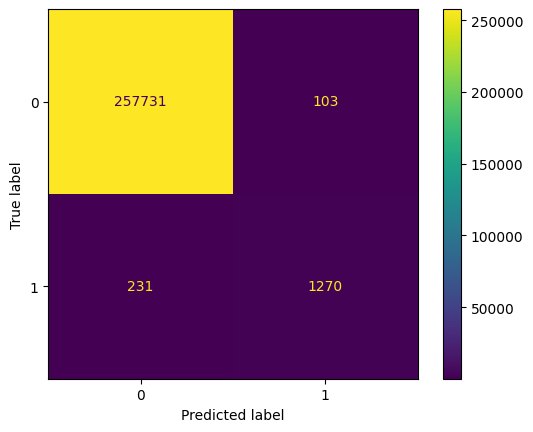

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)

print("Confusion matrix:")
print(cm)

# Задаём метки классов вручную
class_labels = [0, 1]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()
plt.show()


In [63]:
import joblib
joblib.dump(final_model, "../models/lightgbm_fraud_model.pkl")

['../models/lightgbm_fraud_model.pkl']